## Understanding the Data

### `gt_2012.csv`:

- **AT** : Ambient Temperature
- **AP** : Ambient Pressure
- **AH** : Ambient Humidity
- **AFDP** : Air Filter Difference Pressure
- **GTEP** : Gas Turbine Exhaust Pressure
- **TIT** : Turbine Inlet Temperature
- **TAT** : Turbine After Temperature
- **TEY** : Turbine Energy Yield
- **CDP** : Compressor Discharge Pressure
- **CO** : Carbon Monoxide
- **NOx** : Nitrogen Oxides

### Needed packages

In [2]:
import pandas as pd
import numpy as np

### read of the file 

In [14]:
df=pd.read_csv(r"C:\Users\sdany\Desktop\ML-thermo\gt_2015.csv")

### Head of the CSV file

In [15]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


### describe our data

In [16]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


<Figure size 1200x600 with 0 Axes>

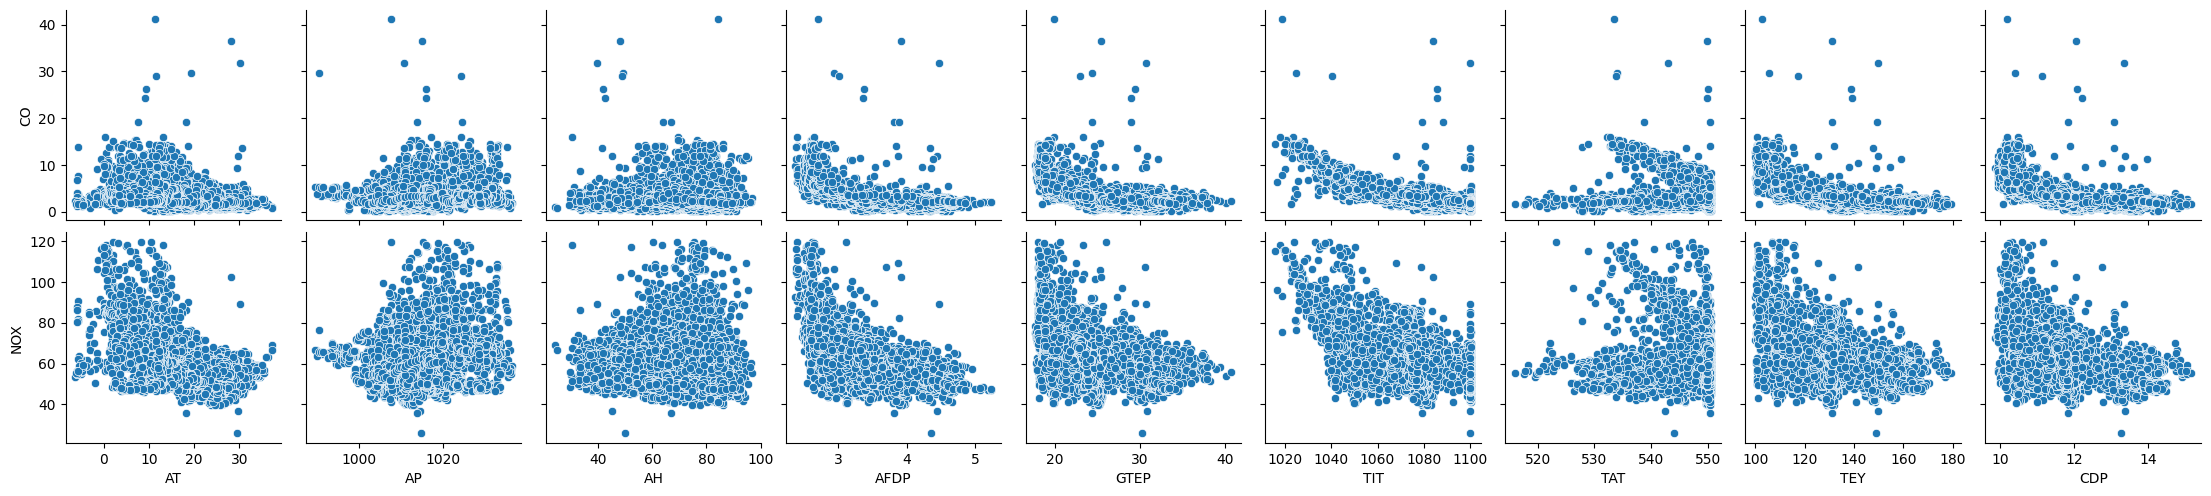

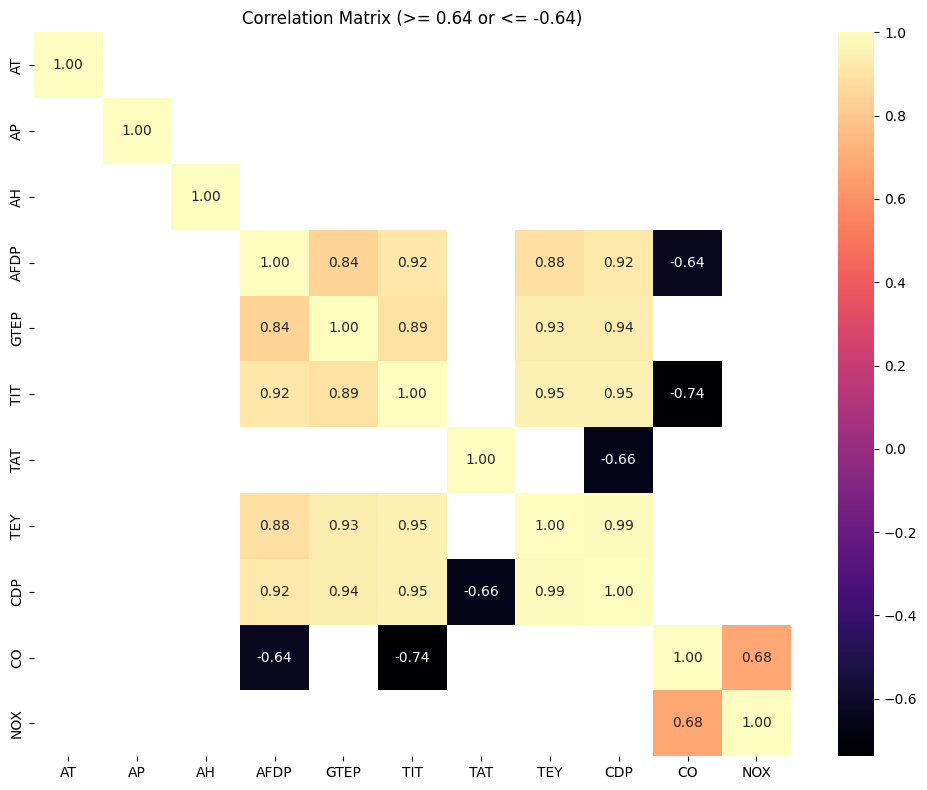

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the value of u
u = 0.64

# Increase figure size
plt.figure(figsize=(12, 6))

# Pairwise scatter plots
sns.pairplot(data=df, x_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP'], y_vars=['CO', 'NOX'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter correlation matrix for coefficients >= u or <= -u
high_corr_matrix = correlation_matrix[(correlation_matrix >= u) | (correlation_matrix <= -u)]

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title(f'Correlation Matrix (>= {u} or <= {-u})')


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Corelation Matrix (>= 0.54 or <= -0.54)')

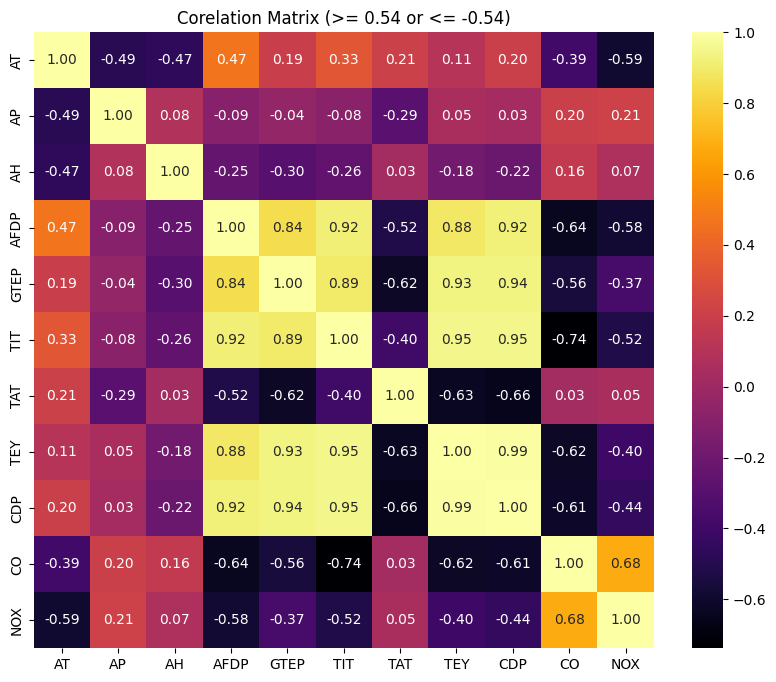

In [21]:
df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title(f'Corelation Matrix (>= {u} or <= {-u})')

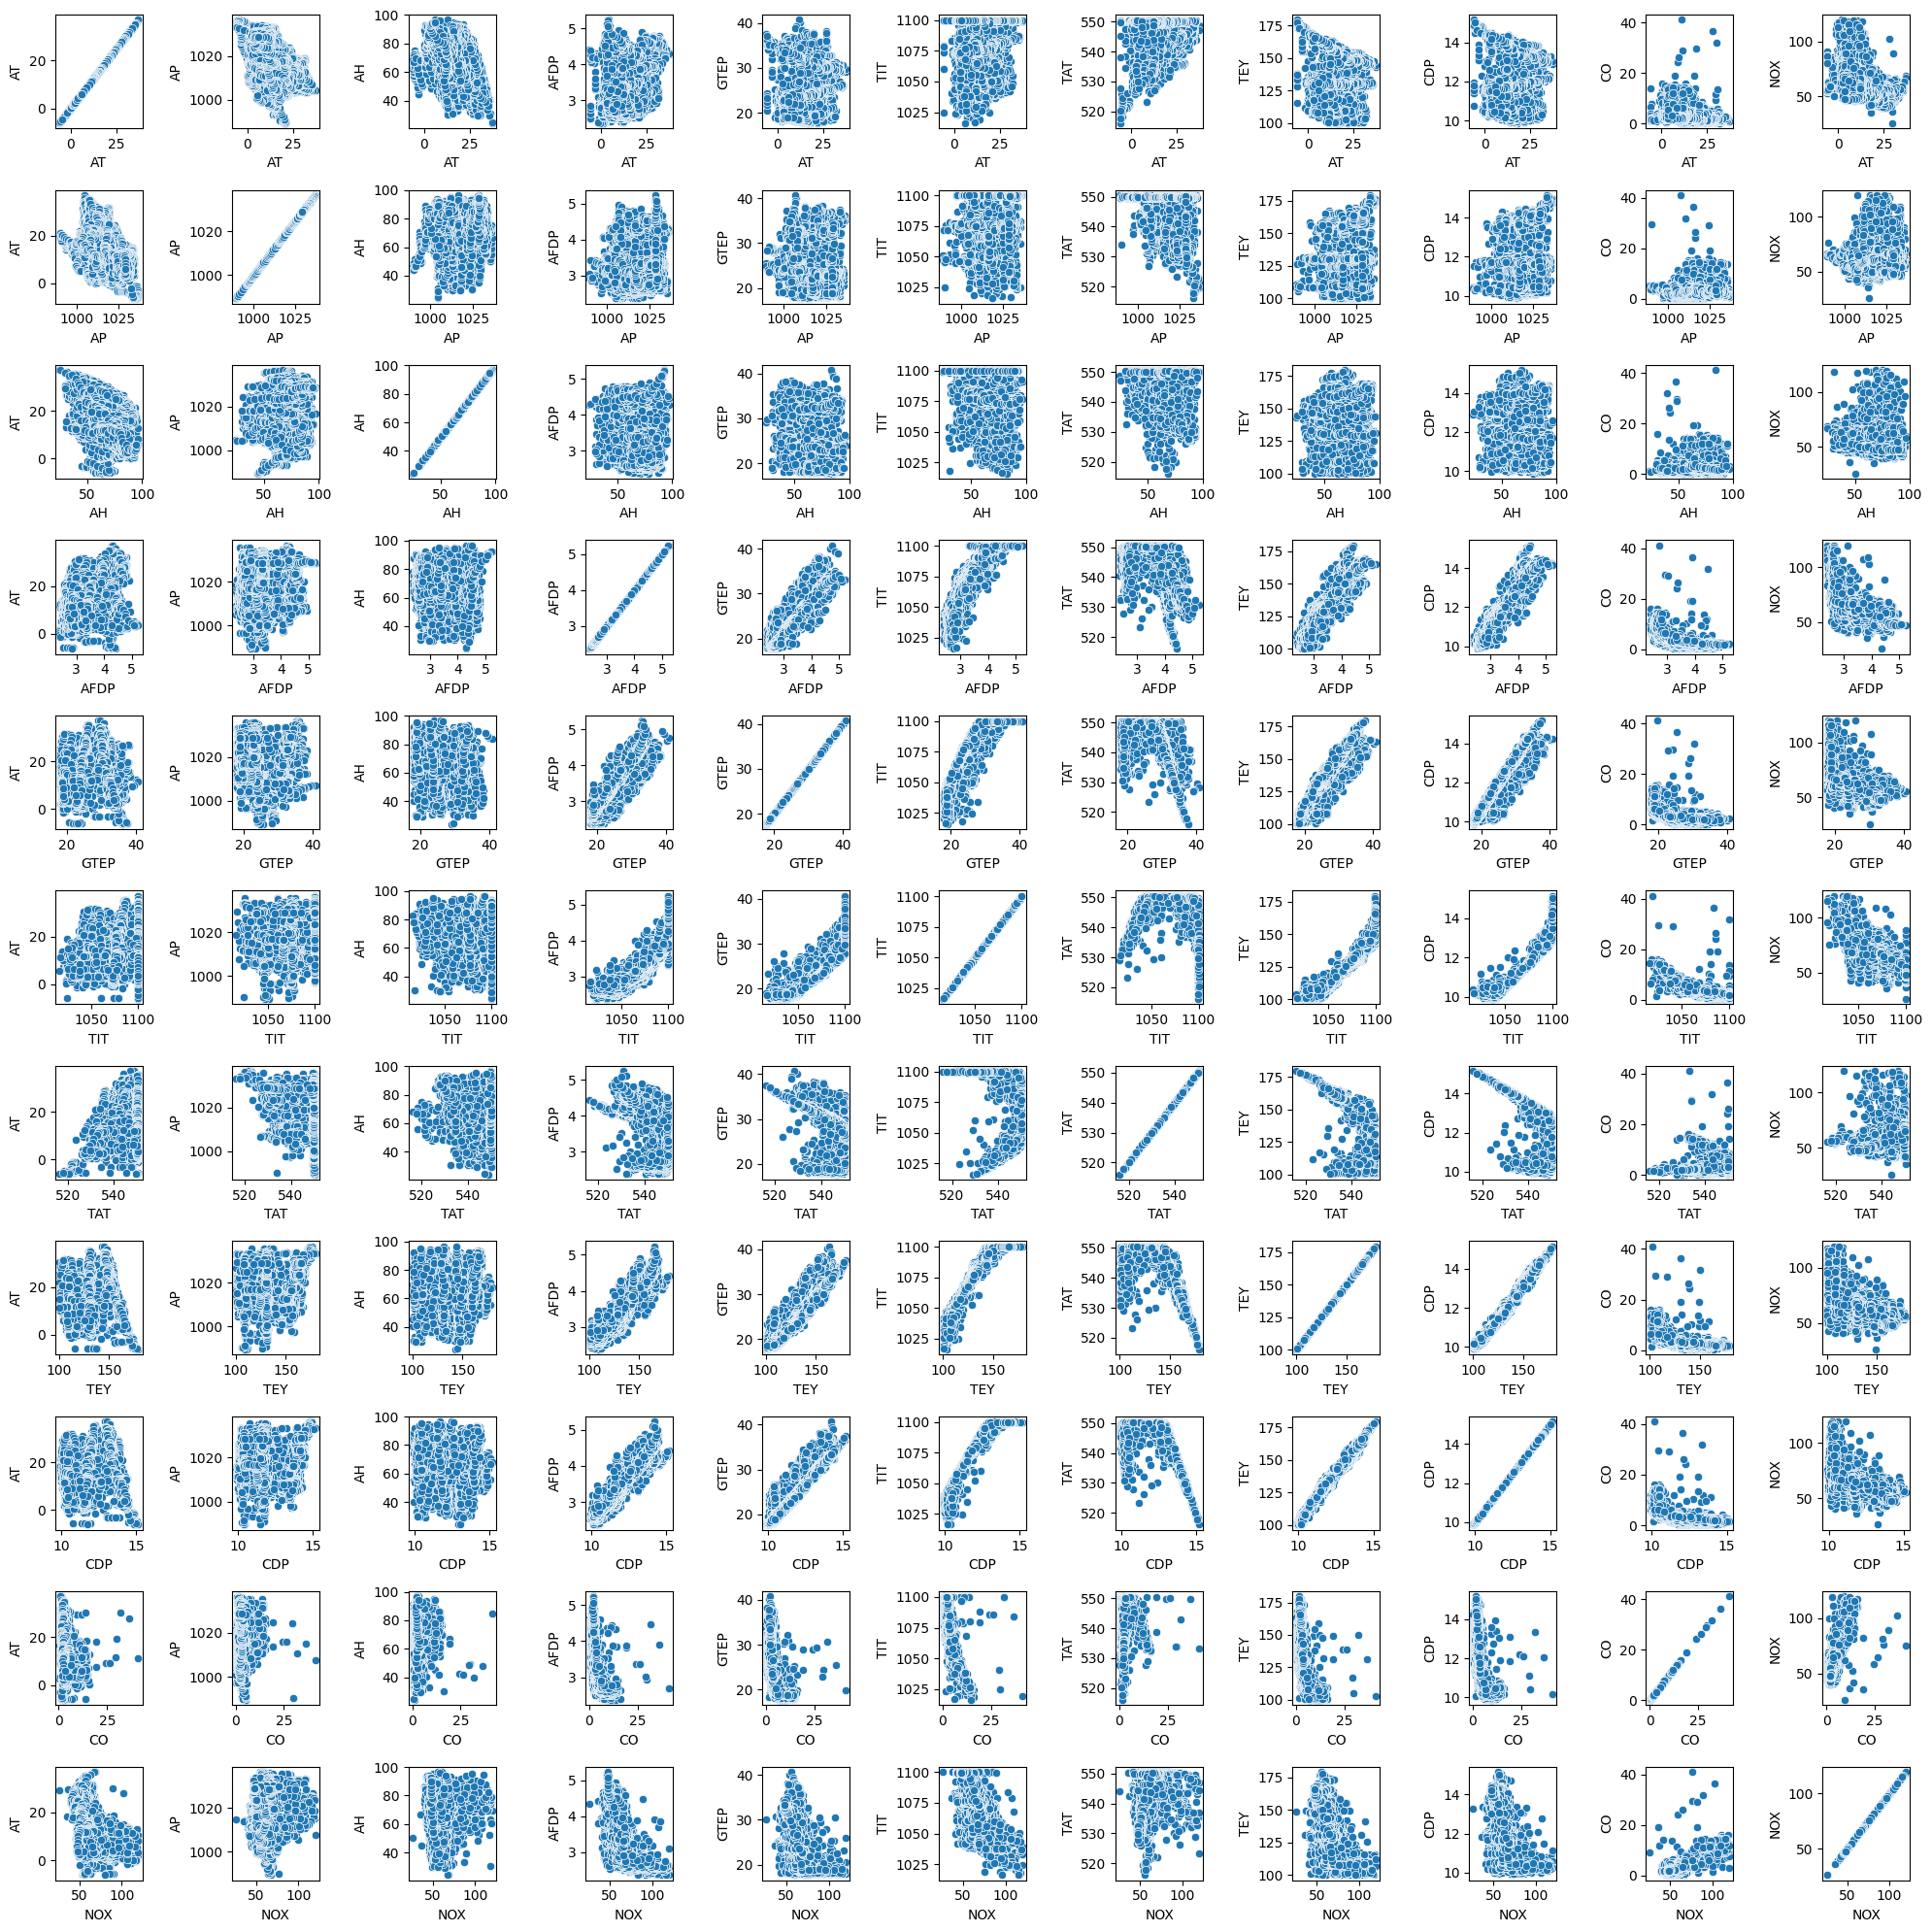

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of variables
variables = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

# Set the number of rows and columns for the matrix of graphs
num_rows = len(variables)
num_cols = len(variables)

# Create the matrix of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Loop through each variable
for i in range(num_rows):
    for j in range(num_cols):
        # Plot the variable against itself as a scatter plot
        sns.scatterplot(x=variables[i], y=variables[j], data=df, ax=axs[i][j])
        axs[i][j].set_xlabel(variables[i])
        axs[i][j].set_ylabel(variables[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
